# Lab 1.3: Exploratory Data Analysis (EDA) with Pandas

## Outline

* Introduction to Pandas
* EDA using Pandas

Exploratory data analysis is a first crucial step to building predictive models from your data. EDA allows you
to confirm or invalidate some of the assumptions you are making about your data and understand relationships between your variables.

## Getting Started with [Pandas](http://pandas.pydata.org/pandas-docs/version/0.17.1/)

### What is Pandas?
A Python library providing data structures and data analysis tools.

### Huh?
Think of it like Excel for Python but better.

In [2]:
#By convention import pandas like:
import pandas as pd

In [3]:
#For fake data.
from numpy.random import randn
import numpy as np

## Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [4]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
num_series = pd.Series(randn(10))
num_series.head()

0   -0.708048
1   -0.088982
2   -1.316593
3    0.411314
4   -0.174575
dtype: float64

In [6]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

## Indexes
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [7]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print (indexed_series)
print ('\n')
print (alt_indexed_series)

California    0.055912
Alabama       0.344969
Indiana       0.087496
Montana       1.325796
Kentucky      0.879472
dtype: float64


Washington    1.126657
Alabama      -1.476289
Montana      -1.514470
Indiana       1.215172
New York     -0.069343
dtype: float64


In [8]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -1.131320
California         NaN
Indiana       1.302668
Kentucky           NaN
Montana      -0.188674
New York           NaN
Washington         NaN
dtype: float64

In [9]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

Alabama      -0.060033
California   -0.276105
Indiana       0.034869
Kentucky      0.191606
Montana      -0.240487
dtype: float64

In [10]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31    1.151146
2015-02-28   -1.486258
2015-03-31    0.171612
2015-04-30   -1.705015
2015-05-31    0.569381
2015-06-30   -1.290185
2015-07-31   -0.075463
2015-08-31    0.760811
2015-09-30    0.710315
2015-10-31    0.352290
Freq: M, dtype: float64

In [11]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q').mean()

2015-03-31   -0.054500
2015-06-30   -0.808606
2015-09-30    0.465221
2015-12-31    0.352290
Freq: Q-DEC, dtype: float64

## DataFrames
Data frames extend the concept of Series to table-like data.

In [12]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-0.651375,0.221333,-0.836096,-0.080427,1.347580
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645
2015-04-30,1.289965,-0.737686,0.096160,-0.453808,-0.721682
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998
2015-06-30,-0.577385,-0.377031,0.409097,-0.376251,0.321368
2015-07-31,0.490679,0.044381,0.444019,1.216976,-0.251194
2015-08-31,0.376711,-0.072741,0.226901,-0.242413,-0.607972
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844
2015-10-31,1.064402,1.049801,1.164941,2.503248,-0.830567


In [13]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [14]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [15]:
#The columns all have the same index:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
#What's the index for the rows?
row.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## DataFrame basics

In [17]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,-0.651375,0.221333,-0.836096,-0.080427,1.347580,-0.430042
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306,1.299787
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645,2.183694
2015-04-30,1.289965,-0.737686,0.096160,-0.453808,-0.721682,0.552279
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998,1.755746
2015-06-30,-0.577385,-0.377031,0.409097,-0.376251,0.321368,-0.954416
2015-07-31,0.490679,0.044381,0.444019,1.216976,-0.251194,0.535060
2015-08-31,0.376711,-0.072741,0.226901,-0.242413,-0.607972,0.303969
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844,1.187327
2015-10-31,1.064402,1.049801,1.164941,2.503248,-0.830567,2.114203


In [18]:
#Delete a column
df.drop('new', axis=1)

,a,b,c,d,e
2015-01-31,-0.651375,0.221333,-0.836096,-0.080427,1.347580
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645
2015-04-30,1.289965,-0.737686,0.096160,-0.453808,-0.721682
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998
2015-06-30,-0.577385,-0.377031,0.409097,-0.376251,0.321368
2015-07-31,0.490679,0.044381,0.444019,1.216976,-0.251194
2015-08-31,0.376711,-0.072741,0.226901,-0.242413,-0.607972
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844
2015-10-31,1.064402,1.049801,1.164941,2.503248,-0.830567


## Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [19]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

,a,b,c,d,e,new
2015-01-31,-0.651375,0.221333,-0.836096,-0.080427,1.347580,-0.430042
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306,1.299787
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645,2.183694
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998,1.755746
2015-06-30,-0.577385,-0.377031,0.409097,-0.376251,0.321368,-0.954416
2015-07-31,0.490679,0.044381,0.444019,1.216976,-0.251194,0.535060
2015-08-31,0.376711,-0.072741,0.226901,-0.242413,-0.607972,0.303969
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844,1.187327
2015-10-31,1.064402,1.049801,1.164941,2.503248,-0.830567,2.114203


## Selecting subsets
There a couple of ways to select a subset of a python data frame.

In [20]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

,a,b,c,d,e,new
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306,1.299787
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645,2.183694
2015-04-30,1.289965,-0.737686,0.096160,-0.453808,-0.721682,0.552279
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998,1.755746
2015-07-31,0.490679,0.044381,0.444019,1.216976,-0.251194,0.535060
2015-08-31,0.376711,-0.072741,0.226901,-0.242413,-0.607972,0.303969
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844,1.187327
2015-10-31,1.064402,1.049801,1.164941,2.503248,-0.830567,2.114203


In [21]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new
2015-02-28,0.633437,0.666350,-0.109188,-0.860639,1.623306,1.299787
2015-09-30,0.534466,0.652861,-0.326828,0.194342,-0.057844,1.187327


In [22]:
#Selecting a column
df.a
#Works sometimes.

2015-01-31   -0.651375
2015-02-28    0.633437
2015-03-31    1.452037
2015-04-30    1.289965
2015-05-31    2.401577
2015-06-30   -0.577385
2015-07-31    0.490679
2015-08-31    0.376711
2015-09-30    0.534466
2015-10-31    1.064402
Freq: M, Name: a, dtype: float64

In [23]:
df['a'] #works always

2015-01-31   -0.651375
2015-02-28    0.633437
2015-03-31    1.452037
2015-04-30    1.289965
2015-05-31    2.401577
2015-06-30   -0.577385
2015-07-31    0.490679
2015-08-31    0.376711
2015-09-30    0.534466
2015-10-31    1.064402
Freq: M, Name: a, dtype: float64

In [24]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,-0.651375,0.221333
2015-02-28,0.633437,0.666350
2015-03-31,1.452037,0.731658
2015-04-30,1.289965,-0.737686
2015-05-31,2.401577,-0.645831
2015-06-30,-0.577385,-0.377031
2015-07-31,0.490679,0.044381
2015-08-31,0.376711,-0.072741
2015-09-30,0.534466,0.652861
2015-10-31,1.064402,1.049801


## Advanced selection
The above methods work for simple types of selections, but what if you need something more complex?

In [25]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,0.730399,1.114318,0.044998
2015-06-30,0.409097,-0.376251,0.321368
2015-07-31,0.444019,1.216976,-0.251194
2015-08-31,0.226901,-0.242413,-0.607972


In [26]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,0.052300,-0.421857,-0.582645
2015-04-30,0.096160,-0.453808,-0.721682
2015-05-31,0.730399,1.114318,0.044998
2015-06-30,0.409097,-0.376251,0.321368
2015-07-31,0.444019,1.216976,-0.251194


In [27]:
# SQL-like queries for parsimonious row selection.
# Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new
2015-03-31,1.452037,0.731658,0.052300,-0.421857,-0.582645,2.183694
2015-04-30,1.289965,-0.737686,0.096160,-0.453808,-0.721682,0.552279
2015-05-31,2.401577,-0.645831,0.730399,1.114318,0.044998,1.755746


In [28]:
# Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [29]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-0.487590,1.094196,1.053163,-1.200902,-0.488650,Alabama
2015-02-28,-0.054719,0.513234,0.193706,0.728743,-2.109234,Alaska
2015-03-31,0.103883,1.921173,1.367425,0.505959,0.102555,Arizona
2015-04-30,-0.751469,-0.141222,0.661877,1.546345,0.779070,Alabama
2015-05-31,0.701404,0.171580,-0.009606,0.515683,-0.508984,Alaska


In [30]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.487590,1.094196,1.053163,-1.200902,-0.488650
Alaska,2015-02-28,-0.054719,0.513234,0.193706,0.728743,-2.109234
Arizona,2015-03-31,0.103883,1.921173,1.367425,0.505959,0.102555
Alabama,2015-04-30,-0.751469,-0.141222,0.661877,1.546345,0.779070
Alaska,2015-05-31,0.701404,0.171580,-0.009606,0.515683,-0.508984


In [31]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.487590,1.094196,1.053163,-1.200902,-0.488650
2015-04-30,-0.751469,-0.141222,0.661877,1.546345,0.779070
2015-07-31,-0.995585,-1.098044,0.167547,0.054310,0.301064
2015-10-31,-0.385128,-0.257248,-0.376567,0.661250,0.281134
2016-01-31,0.736939,1.367034,-0.732832,-0.658417,1.043408


In [32]:
df.loc['2015-01-31']  # Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [ ]:
df.loc[('Alabama', '2015-01-31')]  # Can do this.

In [35]:
# Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

0                             1                     \
state        Alabama    Alaska   Arizona   Alabama    Alaska  Arizona   
index                                                                   
2015-01-31 -0.048355       NaN       NaN -0.198583       NaN      NaN   
2015-02-28       NaN  0.584937       NaN       NaN -0.143104      NaN   
2015-03-31       NaN       NaN -1.840915       NaN       NaN  1.79663   
2015-04-30  0.538481       NaN       NaN  0.198082       NaN      NaN   
2015-05-31       NaN -2.654329       NaN       NaN -0.534252      NaN   

                   2                            3                      \
state        Alabama    Alaska  Arizona   Alabama    Alaska   Arizona   
index                                                                   
2015-01-31  1.791561       NaN      NaN  1.551845       NaN       NaN   
2015-02-28       NaN -1.094974      NaN       NaN  1.020763       NaN   
2015-03-31       NaN       NaN -0.98895       NaN       NaN  0.102497   
2015-04-30  0.770344       NaN      NaN  1.231772       NaN       NaN   
2015-05-31       NaN  0.437716      NaN       NaN  0.108290       NaN   

                   4                      
state        Alabama    Alaska   Arizona  
index                                     
2015-01-31  1.714438       NaN       NaN  
2015-02-28       NaN  1.381843       NaN  
2015-03-31       NaN       NaN -1.596196  
2015-04-30  1.655413       NaN       NaN  
2015-05-31       NaN  0.532988       NaN

In [34]:
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.487590,1.094196,1.053163,-1.200902,-0.488650
Alaska,2015-02-28,-0.054719,0.513234,0.193706,0.728743,-2.109234
Arizona,2015-03-31,0.103883,1.921173,1.367425,0.505959,0.102555
Alabama,2015-04-30,-0.751469,-0.141222,0.661877,1.546345,0.779070
Alaska,2015-05-31,0.701404,0.171580,-0.009606,0.515683,-0.508984


## split-apply-combine

In [35]:
df.groupby(level=1).mean().head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.487590,1.094196,1.053163,-1.200902,-0.488650
2015-02-28,-0.054719,0.513234,0.193706,0.728743,-2.109234
2015-03-31,0.103883,1.921173,1.367425,0.505959,0.102555
2015-04-30,-0.751469,-0.141222,0.661877,1.546345,0.779070
2015-05-31,0.701404,0.171580,-0.009606,0.515683,-0.508984


In [36]:
df.groupby(level=0).mean().head()  # Groupby index

,0,1,2,3,4
state,,,,,
Alabama,0.132610,-0.045459,-0.321344,-0.244004,0.281829
Alaska,0.587588,0.237315,-0.202126,-0.317174,-0.206917
Arizona,-0.041728,-0.048268,0.289833,-0.299355,-0.003041


In [37]:
# Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
# 'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,0.132610,-0.045459,-0.321344,-0.244004,0.281829
Alaska,0.587588,0.237315,-0.202126,-0.317174,-0.206917
Arizona,-0.041728,-0.048268,0.289833,-0.299355,-0.003041


In [38]:
# Apply
g = df.groupby(level=0)

In [39]:
# If one row for each index.
g.aggregate(np.mean)

,0,1,2,3,4
state,,,,,
Alabama,0.132610,-0.045459,-0.321344,-0.244004,0.281829
Alaska,0.587588,0.237315,-0.202126,-0.317174,-0.206917
Arizona,-0.041728,-0.048268,0.289833,-0.299355,-0.003041


In [40]:
# If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.721688,1.425777,1.919696,-1.027508,-0.667797
Alaska,2015-02-28,-0.759735,0.399012,0.418553,1.025109,-1.273341
Arizona,2015-03-31,0.188090,1.544460,1.035376,0.800006,0.103694
Alabama,2015-04-30,-1.028748,-0.119806,1.373208,1.922459,0.430974
Alaska,2015-05-31,0.134625,-0.095062,0.203571,0.816287,-0.202193


## Reading and writing data

In [43]:
df.to_csv('saved_data.csv', delimiter='\t')

In [44]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

## Other very useful things

join, concat and merge

In [46]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

,state,index,0,1,2,3,4,governor
20,Arizona,2016-09-30,-1.521408,-2.016135,-0.501130,0.129394,-1.987903,Doug Ducey
23,Arizona,2016-12-31,0.718587,-0.261420,1.395542,-0.188347,0.377303,Doug Ducey
26,Arizona,2017-03-31,-0.507627,1.132078,-1.435928,-2.139604,-0.391570,Doug Ducey
29,Arizona,2017-06-30,0.442452,0.471012,1.048276,0.495413,1.577641,Doug Ducey
29,Arkansas,NaT,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [48]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

,0,1,2,3,4
state,,,,,
Alabama,0.132610,-0.045459,-0.321344,-0.244004,0.281829
Alaska,0.587588,0.237315,-0.202126,-0.317174,-0.206917
Arizona,-0.041728,-0.048268,0.289833,-0.299355,-0.003041


In [47]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

,0,1,2,3,4,governor
Alabama,0.208752,-0.480120,-0.016911,0.622022,0.062684,Robert Bentley
Alaska,0.385286,-0.783318,0.243022,-0.148556,0.192637,Bill Walker
Arizona,-0.275708,-0.191888,-0.121975,0.546467,-0.146003,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [52]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

,0,1,2,3,4,governor
Alabama,0.132610,-0.045459,-0.321344,-0.244004,0.281829,Robert Bentley
Alaska,0.587588,0.237315,-0.202126,-0.317174,-0.206917,Bill Walker
Arizona,-0.041728,-0.048268,0.289833,-0.299355,-0.003041,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


## Exploratory Data Analysis with Pandas

In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/playgolf.csv', delimiter='|' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


## Describe the continuous variables
### This treats the Boolean Windy variable as a series of 0's and 1's

In [57]:
df.describe()

,Temperature,Humidity
count,14.000000,14.000000
mean,73.571429,80.285714
std,6.571667,9.840486
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,80.000000
75%,78.750000,88.750000
max,85.000000,96.000000


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

### We can make use of df.plot() to produce simple graphs that calls on the more adjustable [Matplotlib](http://matplotlib.org/api/pyplot_api.html) library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b38160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112bb2b00>]], dtype=object)

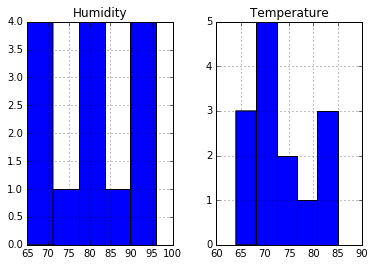

In [58]:
df.hist(['Temperature','Humidity'],bins=5)

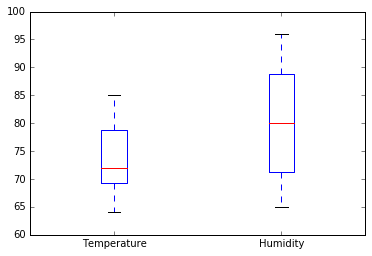

In [59]:
df[['Temperature','Humidity']].plot(kind='box')

### Scatterplots for examining bivariate relationships

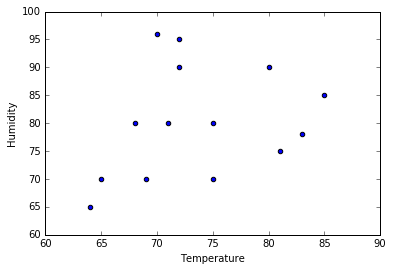

In [60]:
df.plot('Temperature', 'Humidity', kind='scatter');

## What about the categorical variables? Frequency tables and relative frequency tables

### Simply df.value_counts() gets you the frequencies

In [67]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
Name: Outlook, dtype: int64

### Using apply will get you the value counts for multiple columns at once

In [73]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


### Contingency Tables for looking at bivariate relationships between two categorical variables

In [80]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


### Often we want the row percentages

In [81]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


### Or the column percentages

In [82]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


## Lab Exercises [GRADED]

In this scenario, you are a data scientist at [Bay Area Bike Share](http://www.bayareabikeshare.com/). Your task
is to provide insights on bike user activity and behavior to the products team. 


1. Load the `trips` table into a dataframe. 
   
   Make 4 extra columns from the `start_date` column (We will use these in later questions):
   - `month` would contain only the month component
   - `dayofweek` would indicate what day of the week the date is
   - `date` would contain only the date component 
   - `hour` would only contain the hour component
   - [Hint to deal with datetime objects in pandas](http://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly)

2. Group the bike rides by `month` and count the number of users per month. Plot the number of users for each month. 
   What do you observe? Provide a likely explanation to your observation. Real life data can often be messy/incomplete
   and cursory EDA is often able to reveal that.
   
3. Plot the daily user count from September to December. Mark the `mean` and `mean +/- 1.5 * Standard Deviation` as 
   horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations. 
   
   ![image](images/timeseries.png)

4. Plot the distribution of the daily user counts for all months as a histogram. Comment on the distribution you see and explain why the distribution might be shaped as such. 
    
   <img src="images/hist.png" width="500">
  
5. Now we are going to explore hourly trends of user activity. Group the bike rides by `date` and `hour` and count 
   the number of rides in the given hour on the given date. Make a 
   [boxplot](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/) of the hours in the day **(x)** against
   the number of users **(y)** in that given hour. 
   
6. Someone from the analytics team made a line plot (_right_) that he claims is showing the same information as your
   boxplot (_left_). What information can you gain from the boxplot that is missing in the line plot?
   
   ![image](images/q1_pair.png)

7. ** Extra Credit **: Replot the boxplot in `6.` after binning your data into weekday and weekend. Describe the differences you observe between hour user activity between weekday and weekend? 
    

In [2]:
!conda install psycopg2 -y
!pip install ipython-sql

%load_ext sql
%pylab inline  
import pandas as pd
import yaml

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/justin/anaconda:
#
psycopg2                  2.6.2                    py35_0  


/Users/justin/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/justin/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Populating the interactive namespace from numpy and matplotlib


In [3]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

%sql $connection_string

trips_table = %sql SELECT * FROM trips;
trips = trips_table.DataFrame()

trips.head()

144015 rows affected.


,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [106]:
# month would contain only the month component
trips['month'] = trips.start_date.dt.month

# dayofweek would indicate what day of the week the date is
trips['dayofweek'] = trips.start_date.dt.dayofweek

# date would contain only the date component
trips['date'] = trips.start_date.dt.date

# hour would only contain the hour component
trips['hour'] = trips.start_date.dt.hour

trips.head()
trips.tail()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,dayofweek,date,hour
144010,198771,385,2014-02-28 22:15:00,Powell Street BART,53,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404,2,4,2014-02-28,22
144011,198772,145,2014-02-28 22:38:00,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111,2,4,2014-02-28,22
144012,198773,677,2014-02-28 22:45:00,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102,2,4,2014-02-28,22
144013,198774,64128,2014-02-28 23:01:00,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124,2,4,2014-02-28,23
144014,198775,570,2014-02-28 23:20:00,2nd at South Park,64,2/28/2014 23:30,Townsend at 7th,65,577,Subscriber,94107,2,4,2014-02-28,23


Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/justin/anaconda:
#
seaborn                   0.7.1                    py35_0  


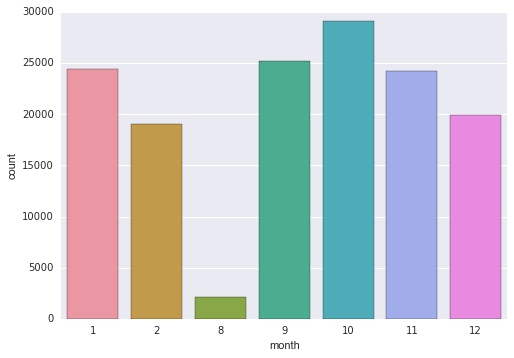

In [107]:
# Group the bike rides by month and count the number of users per month. Plot the number of users for each month. 
# What do you observe? Provide a likely explanation to your observation. 
# Real life data can often be messy/incomplete and cursory EDA is often able to reveal that.

trips.month.value_counts()

!conda install seaborn -y
import seaborn as sns

sns.countplot(x='month', data=trips)

# there's low counts for August, and months 3-7 are missing.
# I would consider the month-years because months from different years can overlap

# the earliest date is 8/29/2013, and the latest date is 2014-02-28

# Hence, August is lacking because data was collected starting the 29th, and we went only up to the following February.

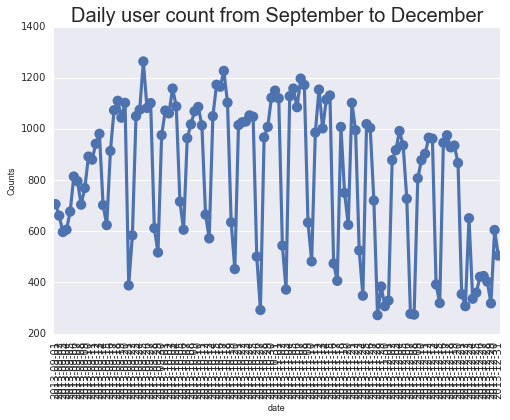

In [111]:
# Plot the daily user count from September to December. Mark the mean and mean +/- 1.5 * Standard Deviation as 
# horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations. 

import matplotlib.pyplot as plt
x = trips[trips['month']>=9].groupby(trips.date).count().trip_id
#print(x.head())

#http://savvastjortjoglou.com/nba-draft-part02-visualizing.html
x_values = x.index  
y_values = x.values
title = ('Daily user count from September to December')
plt.title(title, fontsize=20)
plt.ylabel('Counts', fontsize=9, rotation='vertical')
plt.xlabel('Months', fontsize=9, rotation='horizontal')
#sns.despine(left=True, bottom=True) 
#plt.plot(x_values, y_values)
sns.pointplot(x=x_values, y=y_values)
#locs, labels = plt.xticks()
plt.xticks(rotation='vertical')

# Display our graph
plt.show()

date
2013-08-29    748
2013-08-30    714
2013-08-31    640
2013-09-01    706
2013-09-02    661
Name: trip_id, dtype: int64


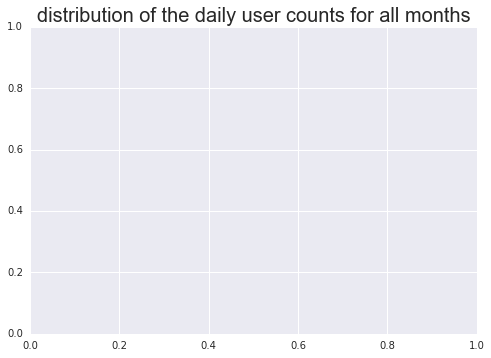

In [119]:
# Plot the distribution of the daily user counts for all months as a histogram. 
# Comment on the distribution you see and explain why the distribution might be shaped as such. 

import matplotlib.pyplot as plt
x = trips.groupby(trips.date).count().trip_id
print(x.head())

#http://savvastjortjoglou.com/nba-draft-part02-visualizing.html
x_values = x.index
y_values = x.values

title = ('distribution of the daily user counts for all months')
plt.title(title, fontsize=20)
# sns.distplot(a=y_values, bins=x_values)

# plt.show()

In [120]:
# Someone from the analytics team made a line plot (right) that he claims is showing the same information as your 
# boxplot (left). What information can you gain from the boxplot that is missing in the line plot?

# the line plot lacks confidence interval information.

# Research for tomorrow:
## What is Anscombe's Quartet?
### Be prepared to explain it tomorrow at the beginning of class.